# 05 - Data visualization with matplotlib and seaborn


This notebook will show you:
- []
- []
- []

For this tutorial we are going to use the Boston dataset:

In [1]:
from sklearn.datasets import load_diabetes

dataset = load_diabetes(as_frame=True)
dataset['frame']

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [2]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## Matplotlib

(Explain the logic behind Matplotlib)
    
### Figure and axes
- The Figure is the final image, which can contain more than one subfigures (refered to as plots or Axes).
- Axes are individual plots contained inside a Figure.
    - They are not the "axis" of a figure!

- The command `plt.subplots` allows you to create a Figure and specify the number of Axes inside.

The following command creates a Figure with a single Axes:

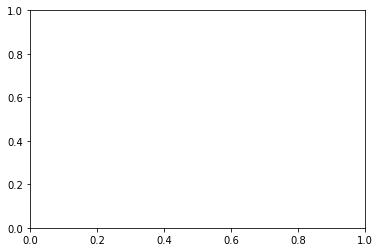

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

In [14]:
print(fig)
print(ax)

Figure(864x1440)
AxesSubplot(0.551296,0.0236113;0.445231x0.171388)


We can also create a Figure with 2 Axes distributed across rows:

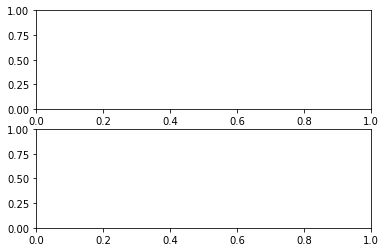

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=1)

In [17]:
print(ax)

[<AxesSubplot:> <AxesSubplot:>]


It is an array of two Axes. This means we can also separate our subplots like:

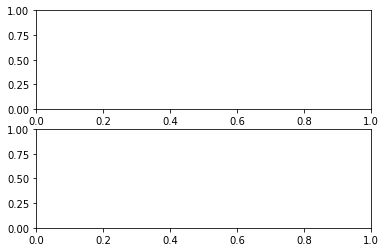

In [8]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1)

In [9]:
ax0

<AxesSubplot:>

Now it corresponds to a single Axes.

We can also change the size of the plots:

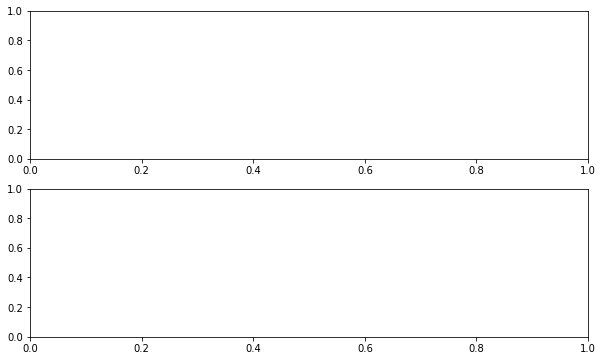

In [10]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

### Exercise
How would you create a Figure with 2 Axes, one per column?

#### Answer

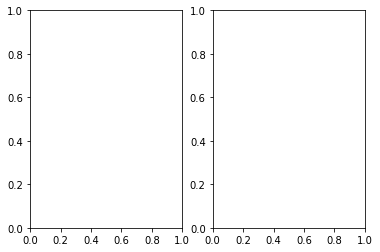

In [11]:
#fig, ax = plt.subplots(nrows=1, ncols=2)

## Inspect the dataset

Show correlation between age and diabetes progression:

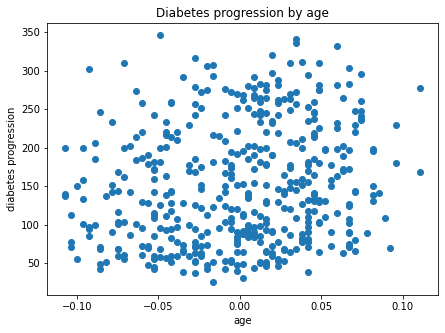

In [12]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(dataset["frame"]["age"], dataset["frame"]["target"])
ax.set_xlabel("age")
ax.set_ylabel("diabetes progression")
ax.set_title("Diabetes progression by age")
plt.show()

Let's now plot how all features correlate with the predictor in a single plot.

To do this, we need to ..

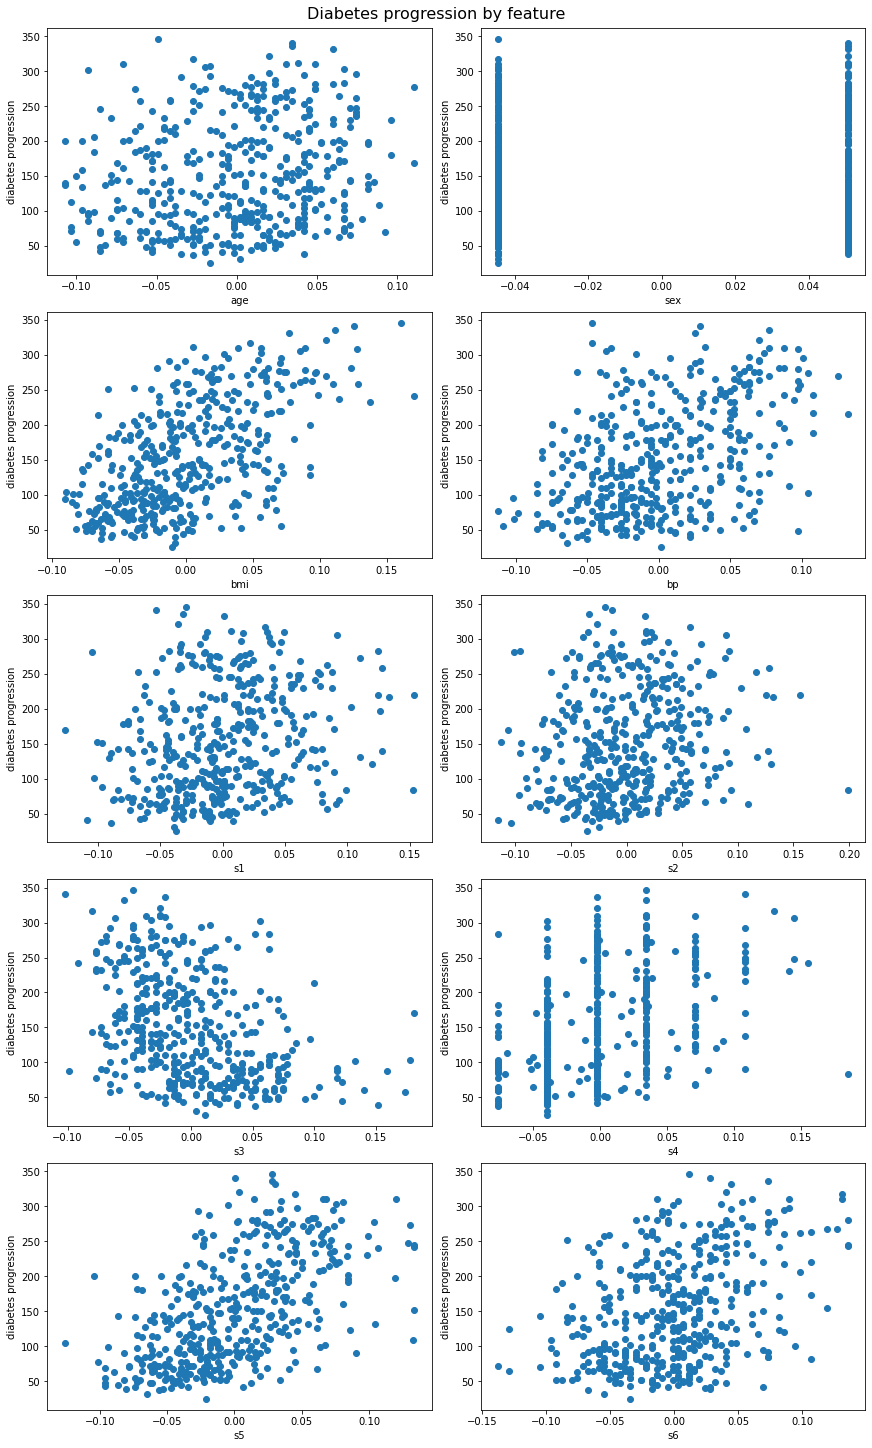

In [13]:
nrows = 5
ncols = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(12,20), constrained_layout=True)
fig.suptitle("Diabetes progression by feature", fontsize=16)

for idx, ax in enumerate(axes.flatten()):
    predictor = dataset['frame'].iloc[:, idx]
    ax.scatter(predictor, dataset['frame']['target'])
    ax.set_xlabel(f"{predictor.name}")
    ax.set_ylabel("diabetes progression")

plt.show()

In [42]:
dataset_sex = dataset["frame"][["sex", "target"]]
dataset_sex = dataset_sex.set_index("sex")
dataset_sex = dataset_sex.rename(index={"0.050680": "0", 0.050680: "1"})
dataset_sex

,target
sex,
0.050680,151.0
-0.044642,75.0
0.050680,141.0
-0.044642,206.0
-0.044642,135.0
...,...
0.050680,178.0
0.050680,104.0
0.050680,132.0


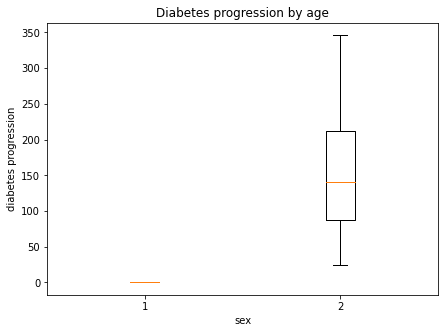

In [19]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax.boxplot([dataset["frame"]["sex"], dataset["frame"]["target"]])
# ax.set_xlabel("sex")
# ax.set_ylabel("diabetes progression")
# ax.set_title("Diabetes progression by age")
# plt.show()

## Other plots with matplotlib:

- Inspect the categorical predictors of the dataset
- Visualize linear regression model

# Seaborn

- Seaborn is built on top of matplotlib
- Show how to prepare your data and create some basic plots using seaborn

## Additional resources
- [Data Visualization in Python _by Kirstie Whitaker_](https://www.youtube.com/watch?v=uaKu5a6P3oU)
- [Matplotlib cheatsheet](https://github.com/matplotlib/cheatsheets/blob/master/cheatsheets-1.png)
- [The lifecycle of a plot](https://matplotlib.org/stable/tutorials/introductory/lifecycle.html): Official matplotlib guide to creating a plot.